## Augmentation
There are several ways to augment the data. The simplest way is to save a copy of augmented data and load it during training. A sophisticated way is to augment the data is during batch generation process. I opted for the first choice.

The augmentation parameters are defined in the initializer. The supported operations are following:
1. fix edge patch (white area artifact)
2. translate
3. rotate
4. flip (left right and upside down)

Usage is given below:

In [15]:
from augment import Augment
import cv2
import matplotlib.pyplot as plt

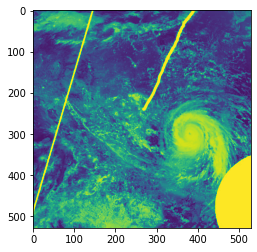

In [16]:
img = cv2.imread('test_img.jpg', 0)
h, w = img.shape
img = img[:h, :h]
plt.imshow(img)

### Initialize augmenter


In [17]:
aug = Augment(translate_range=(0.1, 0.1), 
              rotation_range=(-45, 45),
             flip_fraction=0.5)

#### white patch

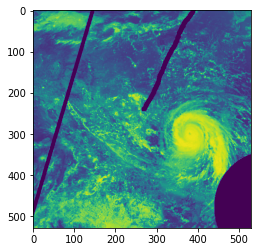

In [18]:
augmented = aug.fix_edge_patch(img)
plt.imshow(augmented)

#### translate

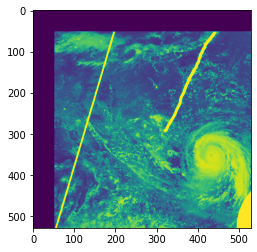

In [19]:
augmented = aug.translate(img)
plt.imshow(augmented)

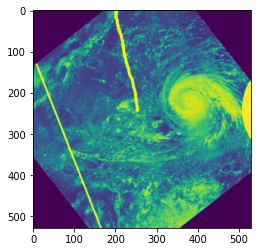

In [20]:
#### Rotate
augmented = aug.rotate(img)
plt.imshow(augmented)

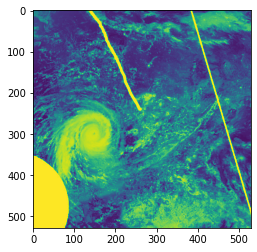

In [22]:
#### flip
augmented = aug.flip_lr(img)
plt.imshow(augmented)

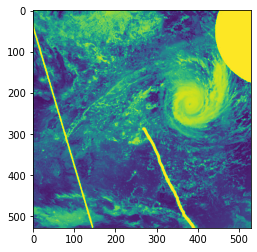

In [23]:
#### flip
augmented = aug.flip_tb(img)
plt.imshow(augmented)

#### Combine augmentation
Using class functions above, we can generate a function which can combine augmentations in a desired way. For example, to apply all in a sequece, following function can be used


In [26]:
def save_aug_images(src, dst, folds):
    files = os.listdir(src)
    files = [f for f in files if f.endswith('.jpg')]
    os.makedirs(dst, exist_ok=True)

    aug = Augment(translate_range=(-0.1, 0.1),
                  rotation_range=(-90, 90),
                  flip_fraction=0.5)

    for fold in range(folds):
        for file in files:
            img = cv2.imread(join(src, file), 0)
            if img is None:
                continue
            img = aug.fix_edge_patch(img)
            img = aug.flip_lr(img)
            img = aug.translate(img)
            img = aug.rotate(img)
            cv2.imwrite(join(dst, f'{file[:-4]}.{fold}.jpg'), img)
